In [7]:
"""
Magic commands
"""
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "C:\\code\\speciale\\") # vesl path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import pandas as pd
import openpyxl
from codelib.plotting import dist_vs_normal_plot, volume_contribution_plot, DefaultStyle, default_colors

sns.set_theme("paper","whitegrid")
DefaultStyle()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
test_data = pd.read_parquet('ef805fd82ff54fadb363094e3b122ab9.parquet', engine='pyarrow')
test_data
spy_prices = test_data[["time_id", "price"]]
spy_prices = spy_prices.set_index("time_id", drop = True)
spy_returns = (spy_prices["price"] / spy_prices["price"].shift() - 1).dropna()

## Prices and returns

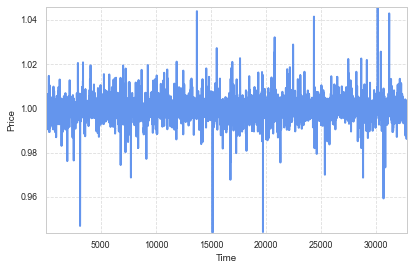

In [3]:
fig, ax = plt.subplots(figsize = (6, 4))
ax.plot(spy_prices)
ax.set(xlabel = "Time", ylabel = "Price")
fig.tight_layout()
#plt.savefig("plots/spy500_train_prices.png")

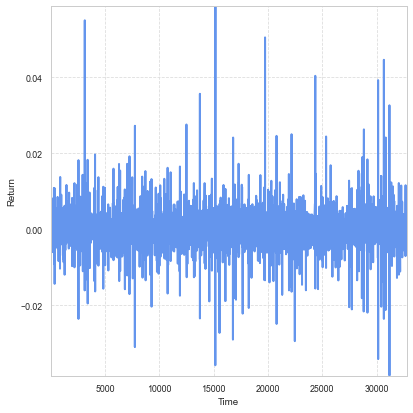

In [4]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.plot(spy_returns)
ax.set(xlabel = "Time", ylabel = "Return")
fig.tight_layout()
plt.savefig("plots/s0_returns.png")

## Autocorrel of returns

In [8]:
acf(spy_returns, nlags = 5)[1:]

array([ 0.00251712, -0.00442819, -0.0095977 , -0.00898606, -0.00864612])

[(0.0, 41.0),
 (-0.2, 1.0),
 Text(0.5, 1.0, ''),
 Text(0.5, 14.7, 'Lag'),
 Text(19.575000000000003, 0.5, 'Autocorrelation')]

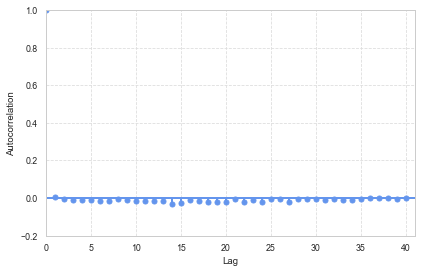

In [6]:
fig, ax = plt.subplots( figsize = (6, 4))
#pd.plotting.autocorrelation_plot(spy_returns, ax = ax, alpha = 0.75)
sm.graphics.tsa.plot_acf(spy_returns, lags = 40, ax = ax, alpha = 0.5)
fig.tight_layout()
ax.set(xlim = (0, 41), ylim = (-0.2, 1), title = None, 
      xlabel = "Lag", ylabel = "Autocorrelation")
#plt.savefig(f"plots/s0_autocorrel.png")

# Absolute returns

In [ ]:
1/3 = 1 / x

In [9]:
acf(np.abs(spy_returns), nlags = 5)[1:]

array([0.09457079, 0.08755694, 0.08746724, 0.07518348, 0.07358721])

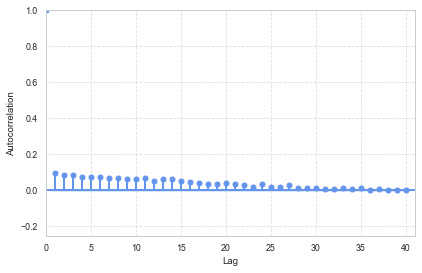

In [21]:
fig, ax = plt.subplots( figsize = (6, 4))
#pd.plotting.autocorrelation_plot(spy_returns, ax = ax, alpha = 0.75)
sm.graphics.tsa.plot_acf(abs(spy_returns), lags = 40, ax = ax, alpha = 0.05)
fig.tight_layout()
ax.set(xlim = (0, 41), ylim = (-0.25, None), title = None, 
      xlabel = "Lag", ylabel = "Autocorrelation")
vol_clust_name_abs = "s0_autocorrel_abs"
plt.savefig(f"plots/{vol_clust_name_abs}.png")

## Heavy Tails


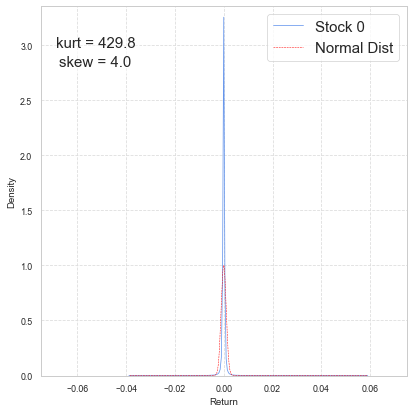

In [26]:
fig, ax = plt.subplots(figsize = (6, 6))
dist_vs_normal_plot(pd.DataFrame(spy_returns), ax = ax, return_label = "Stock 0")
#dist_vs_normal(pd.DataFrame(all_stacked_returns), ax = ax)
ax.set(xlim = (-0.075, 0.075))
fig.tight_layout()
heavy_name = "s0_heavy"
plt.savefig(f"plots/{heavy_name}.png")